Import the pandas library 

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

Read the CSV file into a DataFrame

In [87]:
football_players_df = pd.read_csv('football_players_data.csv')

In [88]:
def percentage_born_in_each_month(df):
    df['Date of birth']  = pd.to_datetime(df['Date of birth']) # Convert 'Date of birth' column to pandas datetime type.
    df['Month of birth'] = df['Date of birth'].dt.month        # Extract the month of the year for each date of birth. 
    total_players = len(df)                                    # Calculate the total number of people in the DataFrame.
    
    # Create a new DataFrame to count the number of people born in each quarter.
    month_counts = df['Month of birth'].value_counts().reset_index() 
    month_counts.columns = ['Month', 'Count']

    # Calculate the percentage of players born in each month.
    month_counts['Percentage'] = round((month_counts['Count'] / total_players) * 100,2) 

    month_counts.sort_values('Month', inplace=True) # Sort the DataFrame by the 'Month' column.
    return month_counts



Define colors for each quarter

In [89]:
quarter_colors = {
    1: ['#1B4841', '#1B4841', '#1B4841'], # January, February, March
    2: ['#5D8690', '#5D8690', '#5D8690'], # April, May, June
    3: ['#9ECFE0', '#9ECFE0', '#9ECFE0'], # July, August, September
    4: ['#F16436', '#F16436', '#F16436']  # October, November, December
}

In [90]:
def create_bar_graph(df,title,source_text ):
    # Create a bar graph
    plt.figure(figsize=(10, 6))

    plt.xlabel('Months')   
    plt.title(title)
    plt.xticks(df['Month'])

    quarter_totals = {}  # To store the total percentage for each quarter

    # Iterate through each month and quarter to set the colors
    for _, row in df.iterrows():
        month = int(row['Month'])  # Convert month to integer
        
        quarter = (month - 1) // 3 + 1
        color_index = (month - 1) % 3  # Get the index for color within the quarter colors list
        
        plt.bar(month, row['Percentage'], color=quarter_colors[quarter][color_index], label=f'Month {month}')
        
        # Add value label above the bar
        plt.text(month, row['Percentage'], f"{row['Percentage']:.2f}%", ha='center', va='bottom',fontsize=8, color='gray')
        
        # Update the total percentage for the quarter
        quarter_totals[quarter] = quarter_totals.get(quarter, 0) + row['Percentage']    

    # Create a custom legend for quarter colors with total percentage
    quarters = df['Month'].apply(lambda x: (x - 1) // 3 + 1).unique()
    legend_handles = []
    for q in quarters:
        quarter_label = f'Quarter {q}: {quarter_totals[q]:.2f}%'
        handle = plt.Rectangle((0, 0), 1, 1, fc=quarter_colors[q][0], label=quarter_label)
        legend_handles.append(handle)

    plt.legend(handles=legend_handles, loc='upper right')

    # Add a source to the graph    
    plt.text(1, -0.12, source_text, ha='right', va='center', transform=plt.gca().transAxes, fontsize=8, color='gray')

    return plt.show()

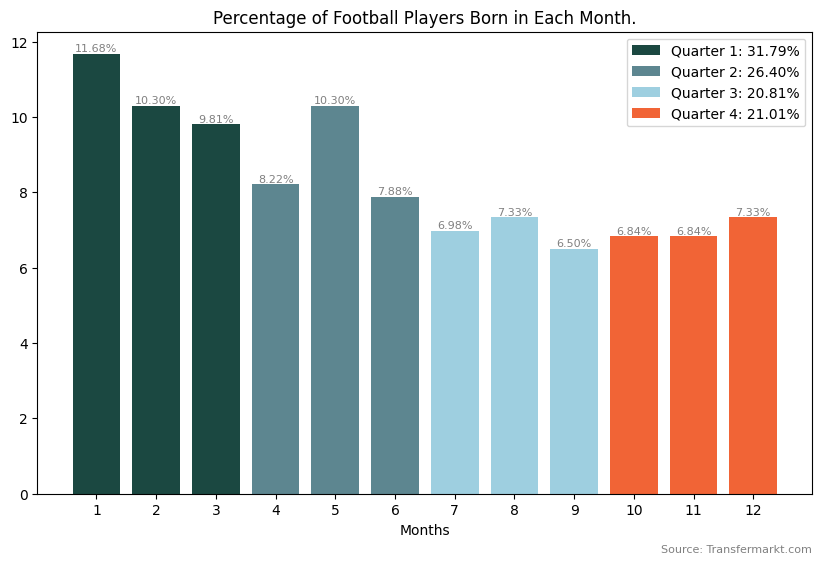

In [91]:
football_players_df    = percentage_born_in_each_month(football_players_df)
football_players_graph = create_bar_graph(football_players_df,title="Percentage of Football Players Born in Each Month.",source_text="Source: Transfermarkt.com")
football_players_graph